# Machine Learning Assignment #

Candidate Number: AB12588
Submission Date: 18.Jun.2021

## Importing libraries & packages

In [ ]:
pip install xgboost
# See word document report for screenshot of succesfull installation 

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns

In [3]:
from numpy import loadtxt
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

## Importing data ## 

In [5]:
path_to_file = "C:/Users/xxxx_/Desktop/KCL/Machine Learning/PneumoniaTimeSeries.csv"
df = pd.read_csv(path_to_file, encoding='utf-8')

## STEP 0: Data Cleaning ## 

In [6]:
# Preliminary Exploring of the Data (1)
df.head()

,PatientID,Age,Mortality30Days,Albumin,Arterialph,CaO2,DiasBP,Fibrinogen,Fio2,Glucose,Haemoglobin,Heartrate,Lymphocytes,MeanBP,Neutrophils,PaCO2,PaO2,PeripheralO2Saturation,Platelets,PvCO2,SpontaneousRespirationRate,SysBP,Temperature,Urea,WBC
0,100087,49,1,NaN,NaN,NaN,96.0,NaN,50.0,143.0,14.7,85.0,17.0,116.0,74.9,39,386,1.0,222,NaN,0,153.0,36.666667,16,9.1
1,100087,49,1,0.800000,NaN,NaN,83.0,NaN,50.0,NaN,NaN,88.0,NaN,102.0,NaN,48,169,100.0,11,NaN,8,146.0,NaN,9,12.0
2,100087,49,1,1.871030,NaN,NaN,85.0,NaN,NaN,NaN,NaN,89.0,NaN,105.0,NaN,50,303,100.0,9,NaN,7,146.0,37.611111,14,15.0
3,100087,49,1,1.807302,NaN,NaN,77.0,NaN,NaN,NaN,NaN,87.0,NaN,96.0,NaN,63,369,100.0,16,NaN,11,133.0,NaN,17,10.0
4,100087,49,1,1.427441,NaN,NaN,81.0,NaN,NaN,NaN,NaN,86.0,NaN,101.0,NaN,38,341,99.0,17,NaN,15,141.0,NaN,14,11.0


In [7]:
# Preliminary exploring of data (2)
df.info()
print("----------------------------------------------------------------------")
print(" The Shape: ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43344 entries, 0 to 43343
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PatientID                   43344 non-null  int64  
 1   Age                         43344 non-null  int64  
 2   Mortality30Days             43344 non-null  int64  
 3   Albumin                     938 non-null    float64
 4   Arterialph                  2931 non-null   float64
 5   CaO2                        640 non-null    float64
 6   DiasBP                      17924 non-null  float64
 7   Fibrinogen                  409 non-null    float64
 8   Fio2                        2246 non-null   float64
 9   Glucose                     3390 non-null   float64
 10  Haemoglobin                 2210 non-null   float64
 11  Heartrate                   22388 non-null  float64
 12  Lymphocytes                 502 non-null    float64
 13  MeanBP                      179

In [8]:
# Data Descriptives
df.describe()

,PatientID,Age,Mortality30Days,Albumin,Arterialph,CaO2,DiasBP,Fibrinogen,Fio2,Glucose,Haemoglobin,Heartrate,Lymphocytes,MeanBP,Neutrophils,PaCO2,PaO2,PeripheralO2Saturation,Platelets,PvCO2,SpontaneousRespirationRate,SysBP,Temperature,Urea,WBC
count,43344.000000,43344.000000,43344.000000,938.000000,2931.000000,640.000000,17924.000000,409.000000,2246.000000,3390.000000,2210.000000,22388.000000,502.000000,17918.000000,502.000000,43344.000000,43344.000000,21955.000000,43344.000000,59.000000,43344.000000,17922.000000,8332.000000,43344.000000,43344.000000
mean,149719.428571,37.493909,0.234773,2.791032,7.364951,14.440360,59.966470,314.548900,58.825467,149.533038,10.674887,87.622307,8.893028,79.687521,80.293625,43.202589,153.231635,92.153227,7.871701,47.033898,5.251523,117.665439,37.048854,5.828442,5.520017
std,29146.852824,57.654515,0.423862,0.987884,0.085896,2.480271,12.685974,198.194102,23.769441,64.930191,1.918924,18.909794,7.093077,17.328252,14.937080,7.428500,70.260708,21.564514,27.631983,11.878648,4.355099,22.641343,1.281142,6.668052,4.507983
min,100087.000000,-216.000000,0.000000,0.007516,6.860000,5.890460,3.000000,60.000000,0.000000,6.000000,4.700000,27.000000,0.000000,1.000000,1.000000,15.000000,23.000000,0.000000,0.000000,22.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,125516.000000,31.000000,0.000000,2.100411,7.320000,12.818800,51.000000,171.000000,40.000000,111.000000,9.300000,74.000000,4.500000,69.000000,76.100000,37.000000,102.000000,95.000000,2.000000,40.000000,2.000000,101.000000,36.444444,2.000000,2.000000
50%,148436.000000,48.000000,0.000000,2.800000,7.370000,14.361300,58.000000,247.000000,50.000000,134.500000,10.500000,86.000000,7.100000,77.000000,84.550000,43.000000,141.000000,98.000000,5.000000,47.000000,4.000000,115.000000,37.099998,5.000000,5.000000
75%,175432.000000,64.000000,0.000000,3.400000,7.420000,15.991400,67.000000,395.000000,70.000000,171.000000,11.800000,100.000000,11.475000,88.000000,89.800000,48.000000,176.000000,100.000000,7.000000,51.000000,7.000000,132.000000,37.700001,7.000000,7.000000
max,199951.000000,121.000000,1.000000,5.895707,7.620000,22.391100,287.000000,994.000000,100.000000,893.000000,18.000000,183.000000,70.000000,297.000000,98.000000,154.000000,628.000000,100.000000,1058.000000,92.000000,46.000000,255.000000,42.777778,167.000000,76.700000


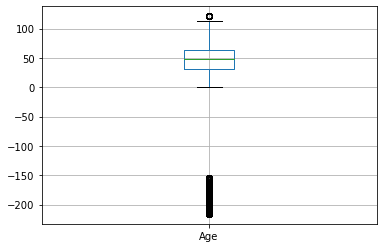

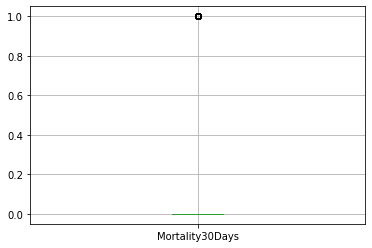

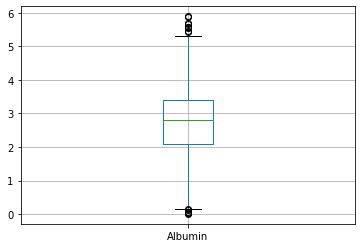

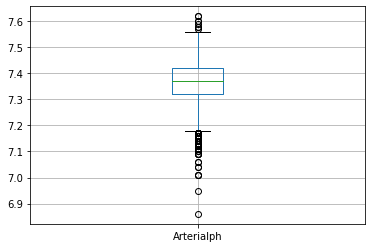

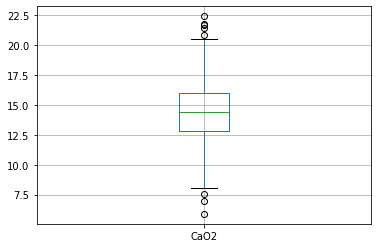

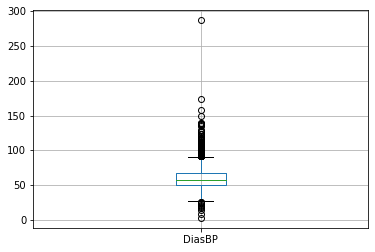

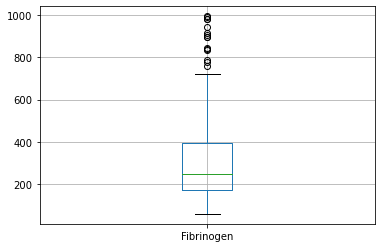

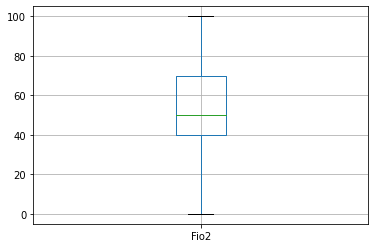

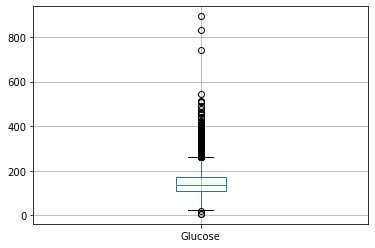

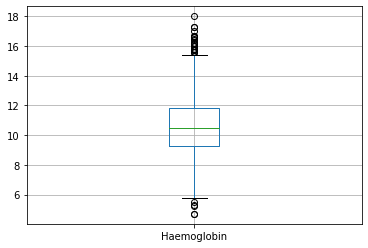

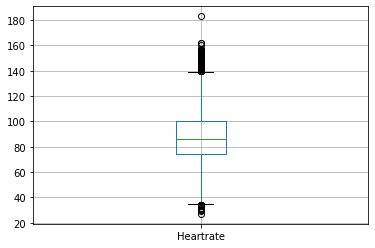

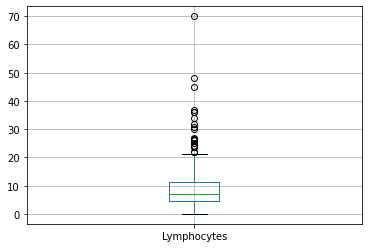

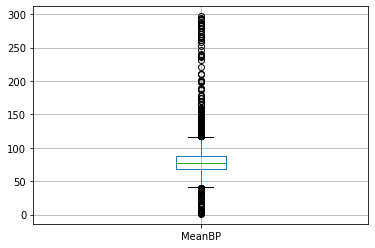

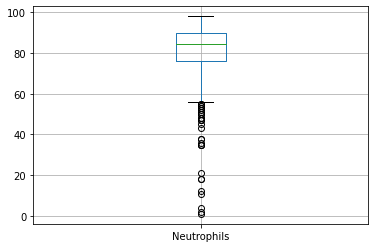

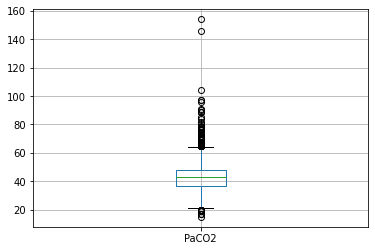

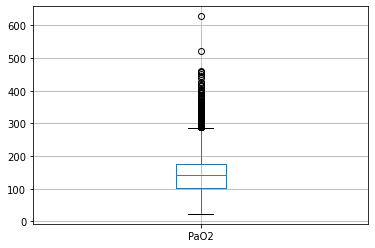

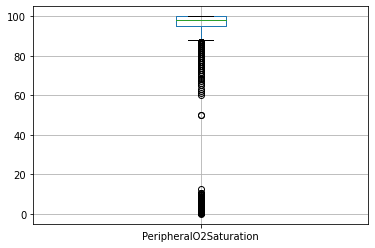

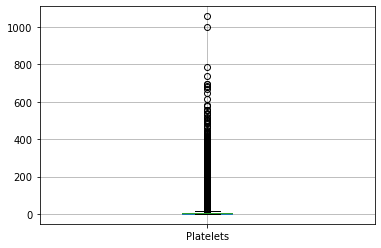

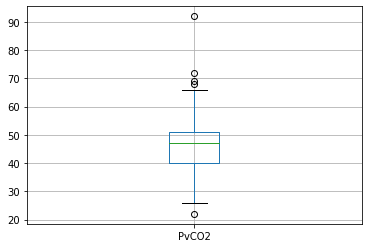

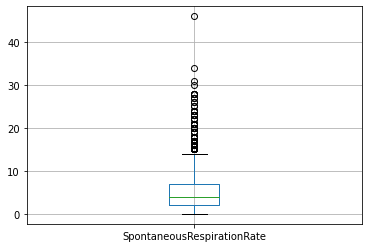

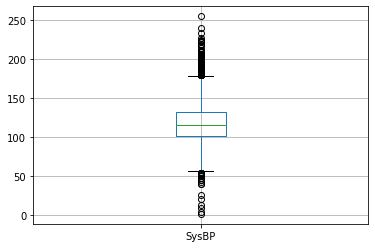

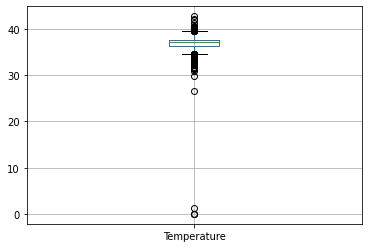

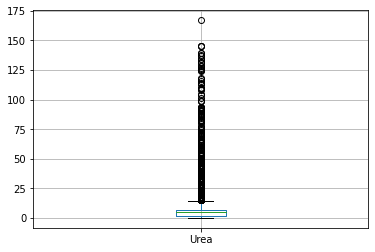

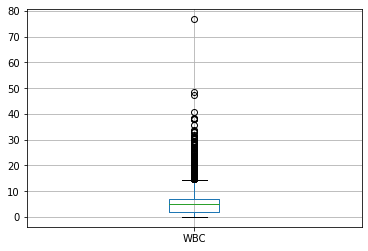

In [9]:
# Creating boxplots for each of the variables
for column in df.iloc[:,1:]:  ## looping through all columns except ID
    plt.figure()
    df.boxplot([column])

Using the boxplots and data descriptives outliers or potentially out of range values were identified. Out of range values were then confirmed through research and replaced by mean value (see below). Missing values were left as missing.

In [10]:
# Mean Temp (w/o out of range values):
## out of range considered as less than 13 
temp_np = np.array(df["Temperature"])
mean_temp = temp_np[(temp_np > 13)].mean()
print("Mean temperature =", round(mean_temp,2))
print("-------------------------------------------------------------")
# Mean Age (w/o out of range values)
## out of range considered as less than 0 and greater than 104
age_np = np.array(df["Age"])
mean_age = age_np[(age_np > 0) & (age_np <= 104)].mean()
print("Mean age =", round(mean_age,2))
print("-------------------------------------------------------------")
# Mean DBP (w/o out of range values)
## out of range considered > 200
dbp_np = np.array(df["DiasBP"])
mean_dbp = dbp_np[dbp_np < 200].mean()
print("Diastolic BP =", round(mean_dbp,2))

Mean temperature = 37.07
-------------------------------------------------------------
Mean age = 48.97
-------------------------------------------------------------
Diastolic BP = 59.95


In [11]:
# Replacing out of range temperature values with mean temperature
df.loc[(df.Temperature < 13), "Temperature"] = mean_temp
# Replacing out of range age values with mean age
df.loc[(df.Age < 0)|(df.Age > 104),"Age"] = mean_age 
# Replacing out of range diastolic bloodpressure values with mean dbp
df.loc[(df.DiasBP > 200),"DiasBP"] = mean_dbp 

In [12]:
# Updated data descriptives
df.describe()

,PatientID,Age,Mortality30Days,Albumin,Arterialph,CaO2,DiasBP,Fibrinogen,Fio2,Glucose,Haemoglobin,Heartrate,Lymphocytes,MeanBP,Neutrophils,PaCO2,PaO2,PeripheralO2Saturation,Platelets,PvCO2,SpontaneousRespirationRate,SysBP,Temperature,Urea,WBC
count,43344.000000,43344.000000,43344.000000,938.000000,2931.000000,640.000000,17924.000000,409.000000,2246.000000,3390.000000,2210.000000,22388.000000,502.000000,17918.000000,502.000000,43344.000000,43344.000000,21955.000000,43344.000000,59.000000,43344.000000,17922.000000,8332.000000,43344.000000,43344.000000
mean,149719.428571,48.920705,0.234773,2.791032,7.364951,14.440360,59.953802,314.548900,58.825467,149.533038,10.674887,87.622307,8.893028,79.687521,80.293625,43.202589,153.231635,92.153227,7.871701,47.033898,5.251523,117.665439,37.066502,5.828442,5.520017
std,29146.852824,20.720128,0.423862,0.987884,0.085896,2.480271,12.572108,198.194102,23.769441,64.930191,1.918924,18.909794,7.093077,17.328252,14.937080,7.428500,70.260708,21.564514,27.631983,11.878648,4.355099,22.641343,0.996325,6.668052,4.507983
min,100087.000000,0.000000,0.000000,0.007516,6.860000,5.890460,3.000000,60.000000,0.000000,6.000000,4.700000,27.000000,0.000000,1.000000,1.000000,15.000000,23.000000,0.000000,0.000000,22.000000,0.000000,1.000000,26.666667,0.000000,0.000000
25%,125516.000000,35.000000,0.000000,2.100411,7.320000,12.818800,51.000000,171.000000,40.000000,111.000000,9.300000,74.000000,4.500000,69.000000,76.100000,37.000000,102.000000,95.000000,2.000000,40.000000,2.000000,101.000000,36.444444,2.000000,2.000000
50%,148436.000000,48.974940,0.000000,2.800000,7.370000,14.361300,58.000000,247.000000,50.000000,134.500000,10.500000,86.000000,7.100000,77.000000,84.550000,43.000000,141.000000,98.000000,5.000000,47.000000,4.000000,115.000000,37.099998,5.000000,5.000000
75%,175432.000000,63.000000,0.000000,3.400000,7.420000,15.991400,67.000000,395.000000,70.000000,171.000000,11.800000,100.000000,11.475000,88.000000,89.800000,48.000000,176.000000,100.000000,7.000000,51.000000,7.000000,132.000000,37.700001,7.000000,7.000000
max,199951.000000,104.000000,1.000000,5.895707,7.620000,22.391100,174.000000,994.000000,100.000000,893.000000,18.000000,183.000000,70.000000,297.000000,98.000000,154.000000,628.000000,100.000000,1058.000000,92.000000,46.000000,255.000000,42.777778,167.000000,76.700000


## Step 1: Data Processing

In [13]:
# Number of patients recorded:
print("There is a total of", df.PatientID.nunique(), "distinct patients in the dataset.")
print("---------------------------------------------------------------------------")
# (Time) intervals per patients:
print(df.PatientID.value_counts()) ## 48/distinct patient 
print("---------------------------------------------------------------------------")

There is a total of 903 distinct patients in the dataset.
---------------------------------------------------------------------------
153675    48
108231    48
192555    48
170118    48
114829    48
          ..
149090    48
104120    48
194292    48
180029    48
151542    48
Name: PatientID, Length: 903, dtype: int64
---------------------------------------------------------------------------


In [14]:
col_names = df.columns.values.tolist() # list of variable names
del col_names[1:3] # removing "time-invariable" variables (age & outcome)
print(col_names)

# Aggregating data by difference in firt and last recorded value for each time-varying variable
df_ff= df[col_names].groupby("PatientID").agg(['first','last']).stack().reset_index()


def diff_calc(x):
    x1 = x[:1].values  # first value
    x2 = x[-1:].values # last value
    
    return abs(x1 - x2) # return absolute difference

df_df = df_ff.groupby('PatientID').agg(diff_calc)

# remerging aggregated data with time-invariant vars (age and morality) 
df_df = df_df.merge(df[['PatientID','Age','Mortality30Days']].groupby('PatientID').agg('first'), on='PatientID')
df_df = df_df.reset_index()

print("-----------------------------------------------------------")

print("Final matrix shape:", df_df.shape)

['PatientID', 'Albumin', 'Arterialph', 'CaO2', 'DiasBP', 'Fibrinogen', 'Fio2', 'Glucose', 'Haemoglobin', 'Heartrate', 'Lymphocytes', 'MeanBP', 'Neutrophils', 'PaCO2', 'PaO2', 'PeripheralO2Saturation', 'Platelets', 'PvCO2', 'SpontaneousRespirationRate', 'SysBP', 'Temperature', 'Urea', 'WBC']
-----------------------------------------------------------
Final matrix shape: (903, 25)


## Step 2: Understanding the data

In [ ]:
# Distribution of binary variable
print(df_df["Mortality30Days"].value_counts())
 ## data is imbalanced; 0 >> 1
print("----------------------------------------------------")
print("Percentage Died=", round((((df_df.Mortality30Days == 1).sum()*100)/903),2))
print("Percentage Survived=", round((((df_df.Mortality30Days == 0).sum()*100)/903),2))

In [ ]:
# Summary descriptives
df_df.describe()

In [15]:
# Summary Descriptives by Outcome
df_df.iloc[:,1:].groupby("Mortality30Days").describe().loc[:,(slice(None),['count','mean','std'])]

Albumin                     Arterialph                       CaO2                     DiasBP                       Fibrinogen                         Fio2                       Glucose                       Haemoglobin                     Heartrate                       Lymphocytes                     MeanBP                       Neutrophils                      PaCO2                        PaO2                       PeripheralO2Saturation                       Platelets                       PvCO2                     SpontaneousRespirationRate                      SysBP                       Temperature                       Urea                         WBC                        Age                      
                  count      mean       std      count      mean       std  count      mean       std  count       mean        std      count       mean        std  count       mean        std   count       mean        std       count      mean       std     count       mean        std       count      mean       std  count       mean        std       count      mean       std  count       mean       std  count       mean        std                  count       mean        std     count       mean        std count      mean       std                      count      mean       std  count       mean        std       count      mean       std  count      mean        std  count      mean       std  count       mean        std
Mortality30Days                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
0                 303.0  0.110062  0.274513      427.0  0.064731  0.065711  175.0  0.761446  1.132793  691.0  11.068017  10.445012      151.0  42.503311   84.71276  208.0  27.264183  23.608921   686.0  45.374636  67.339436       679.0  0.839028  0.931358     691.0  14.688857  12.902314       292.0  1.299658  3.324216  685.0  17.750365  25.206989       292.0  1.602055  4.249996  691.0   6.342981  4.494072  691.0  40.726483  28.540774                  691.0  20.598698  36.925198     691.0   2.545586   1.803103  39.0  0.153846  0.708537                      691.0  2.697540  1.909468  687.0  20.385735  18.767675       687.0  0.952437  0.921090  691.0  2.587554   1.894865  691.0  2.732272  1.964714  691.0  50.931725  20.767642
1                  98.0  0.253063  0.753164      129.0  0.065116  0.068615   52.0  0.709954  1.415662  212.0  11.825254  10.166153       57.0  37.280702  106.11950   77.0  28.440260  22.568634   211.0  39.260664  47.505121       207.0  0.806280  0.951345     212.0  17.094340  16.121299        90.0  0.811111  1.944132  212.0  19.787736  29.875369        90.0  2.398889  6.198414  212.0  12.933962  9.653493  212.0  85.443396  63.398175                  212.0  23.745283  38.077061     212.0  29.382075  81.997054  14.0  0.357143  1.081818                      212.0  4.820755  3.868201  212.0  21.391509  19.062693       211.0  0.977779  0.902809  212.0  7.004717  14.369365  212.0  4.108019  3.246432  212.0  42.365915  19.248150

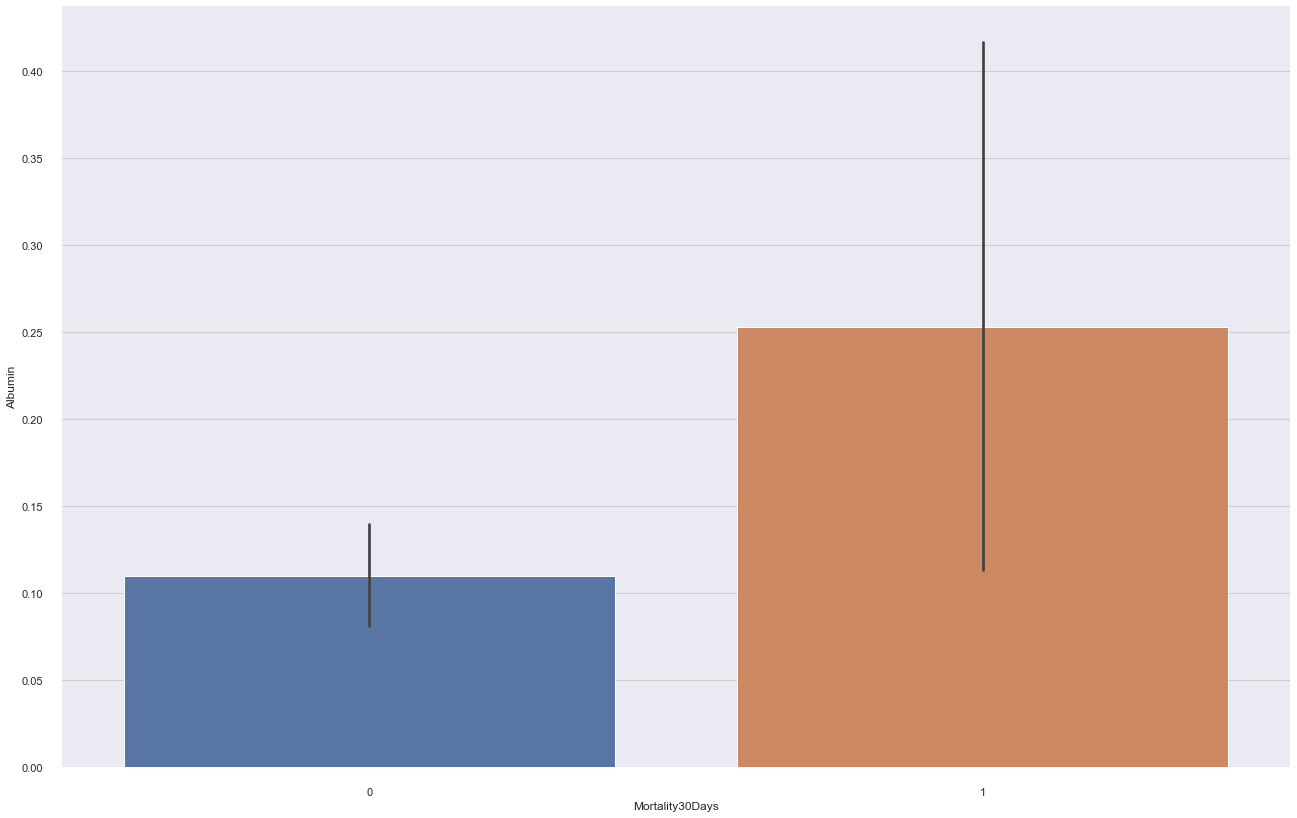

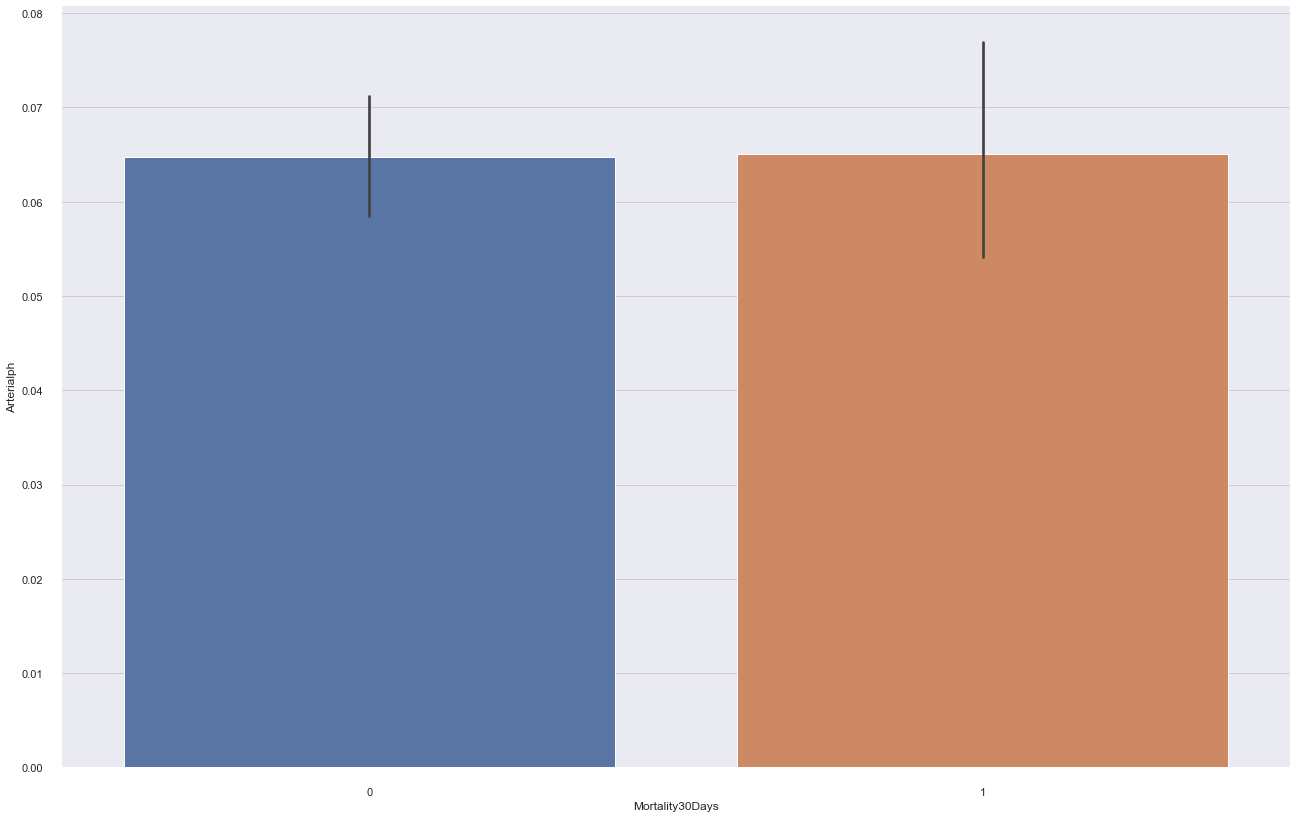

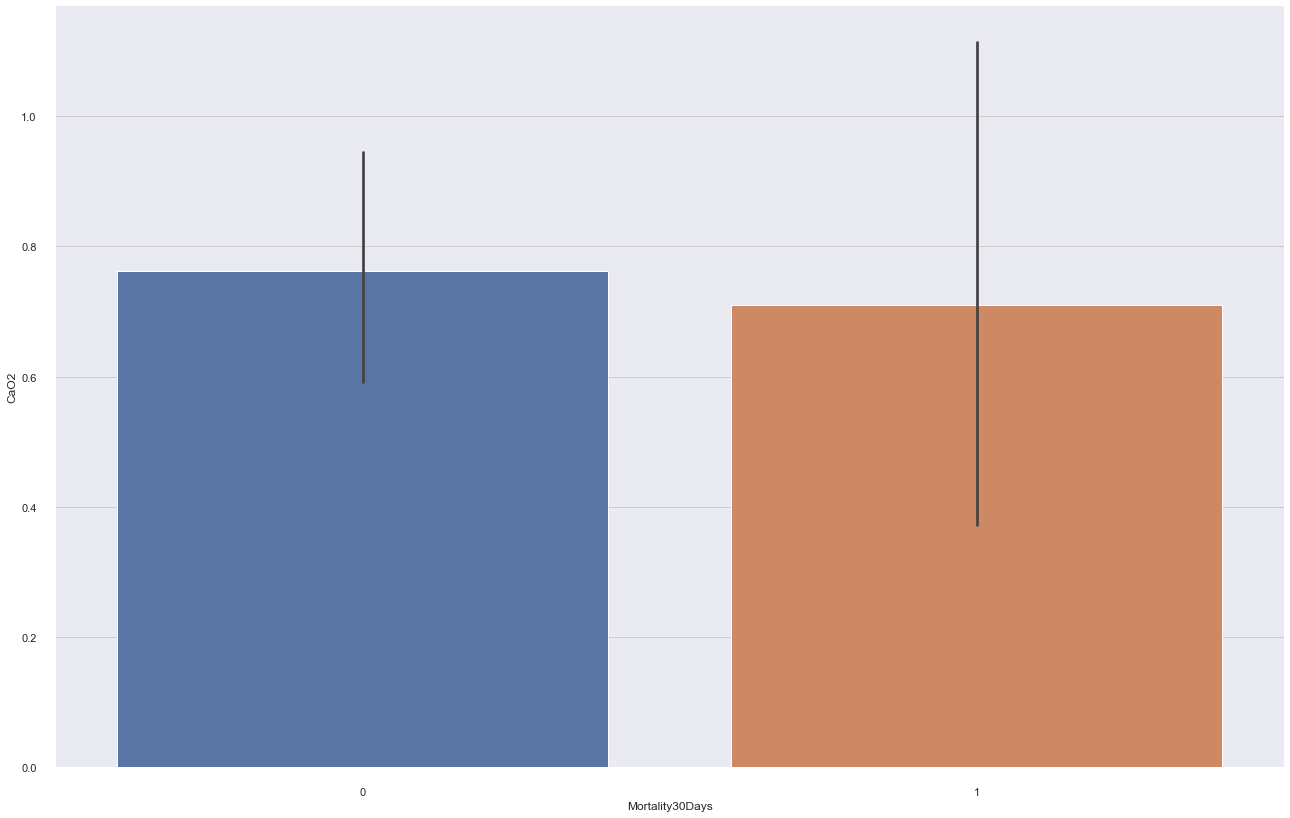

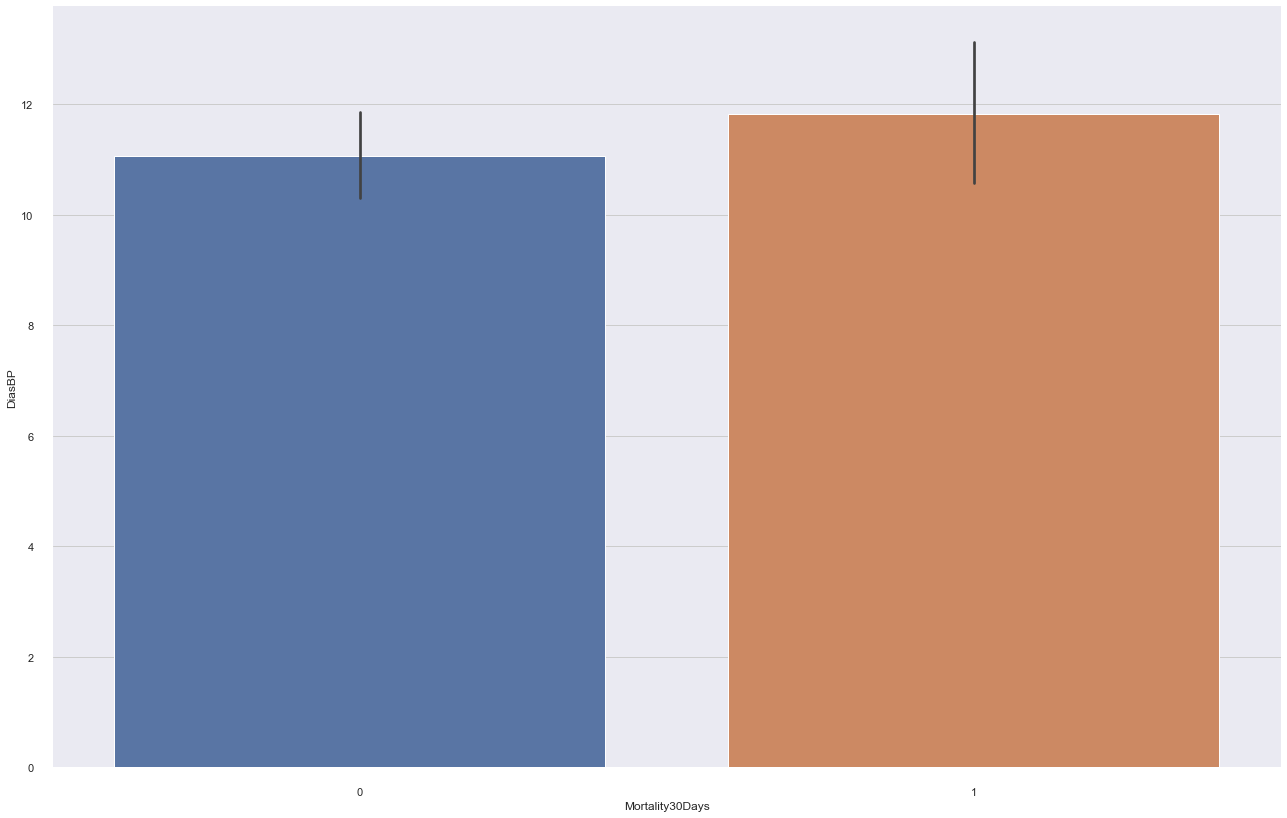

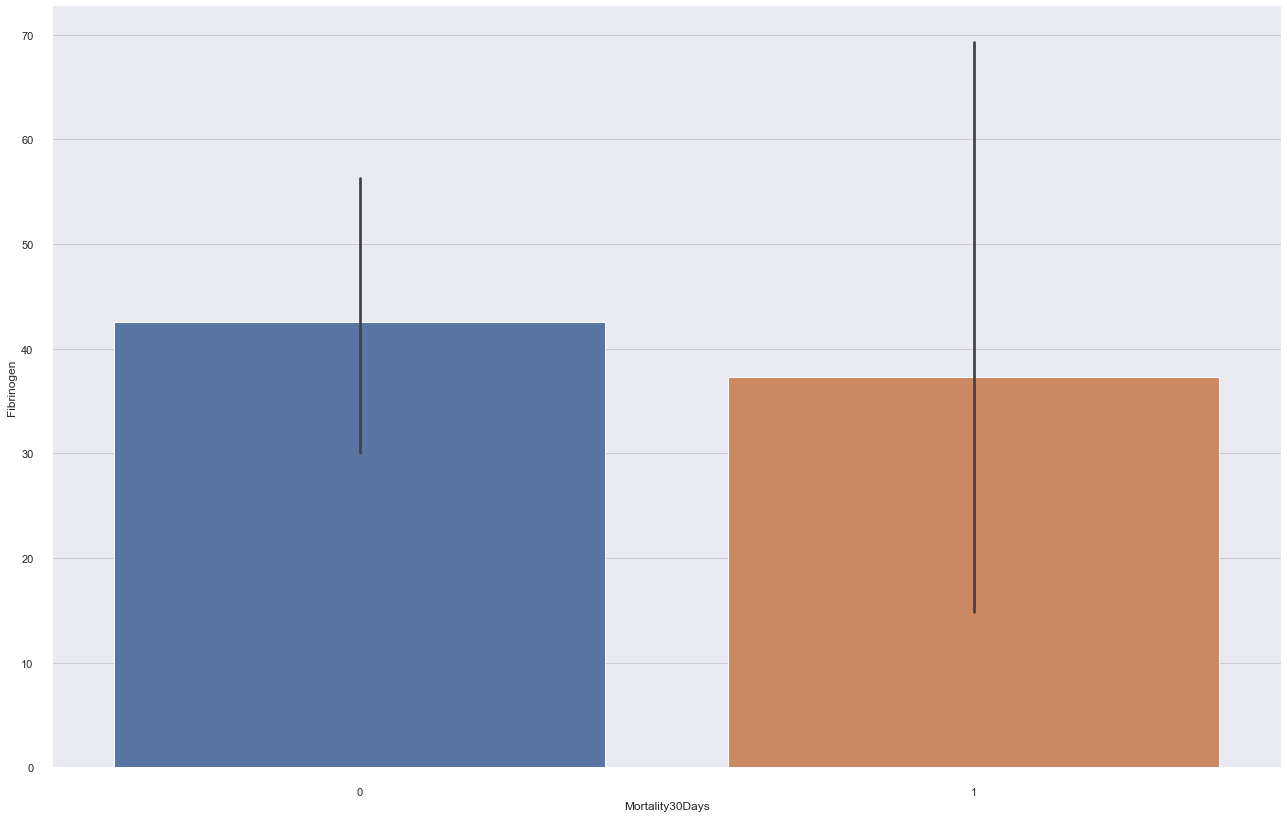

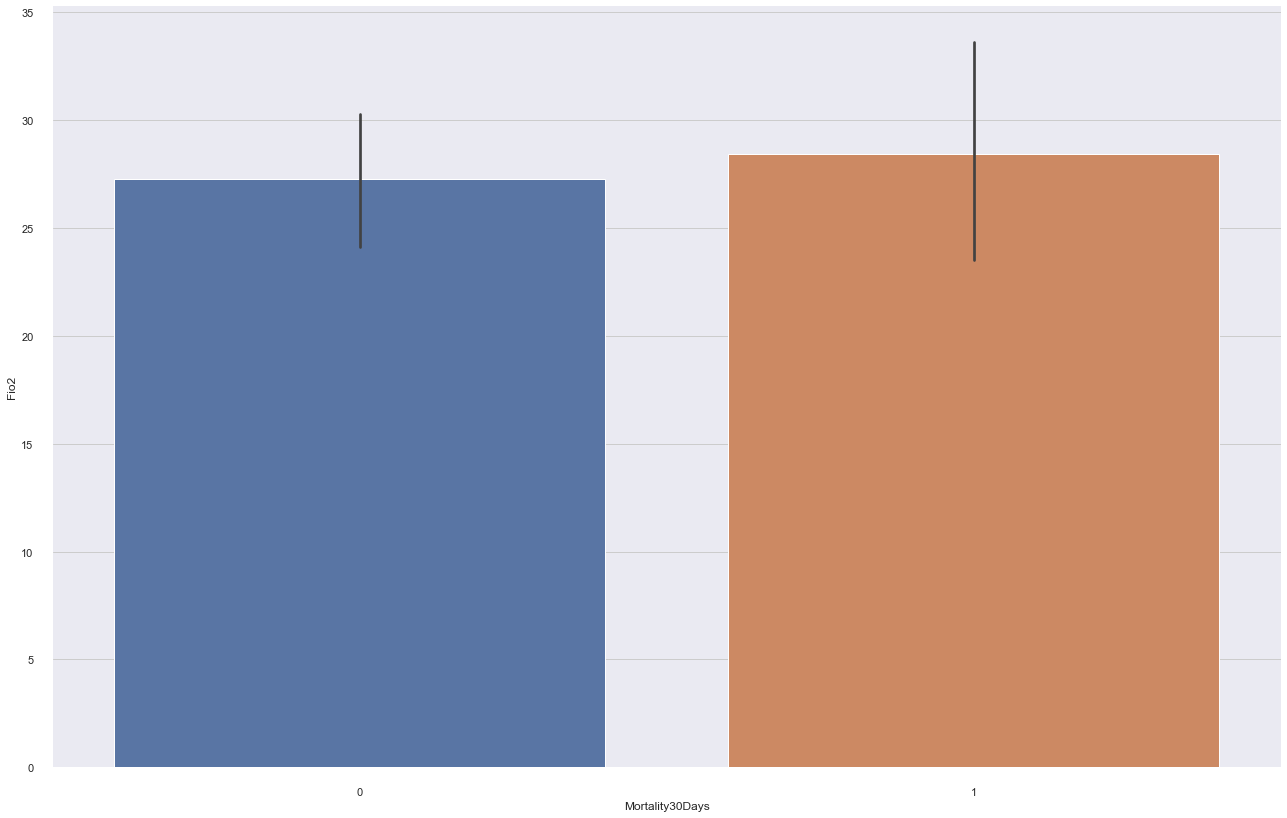

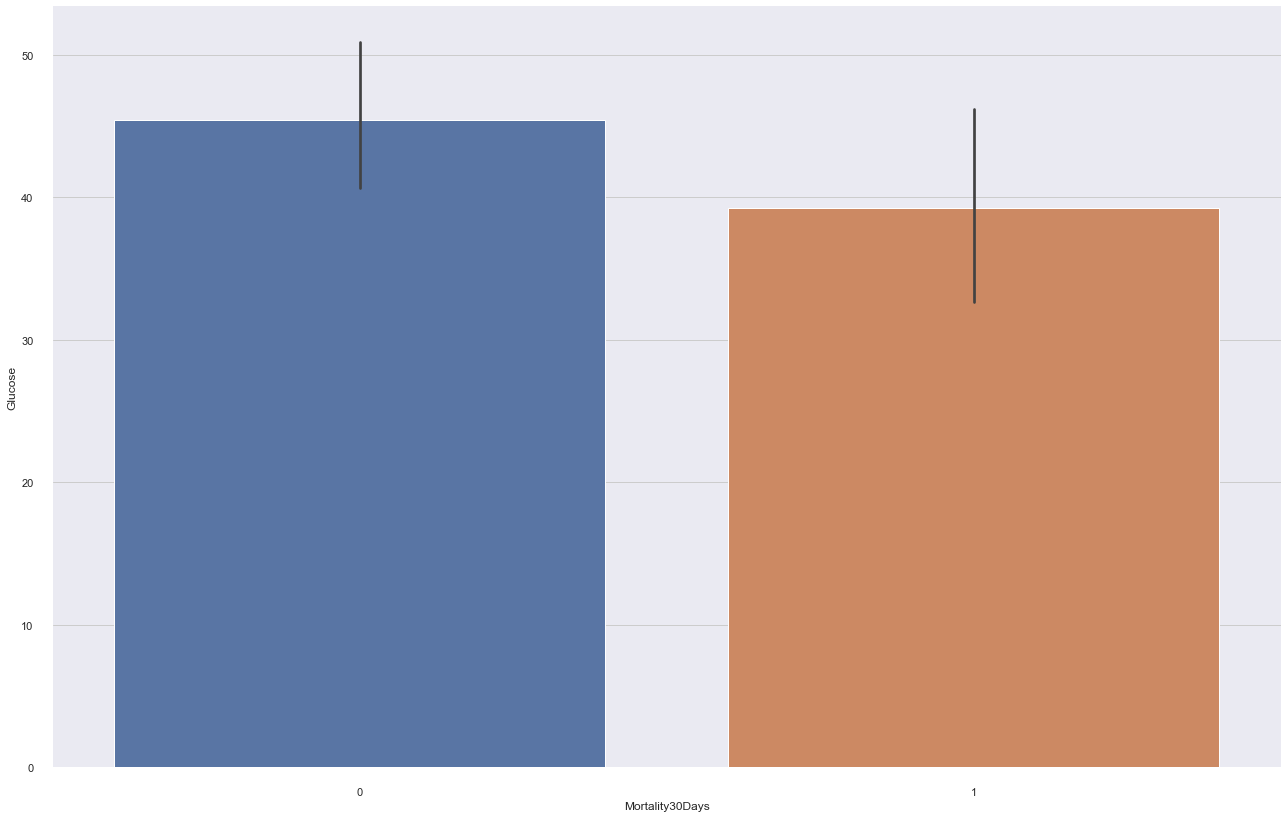

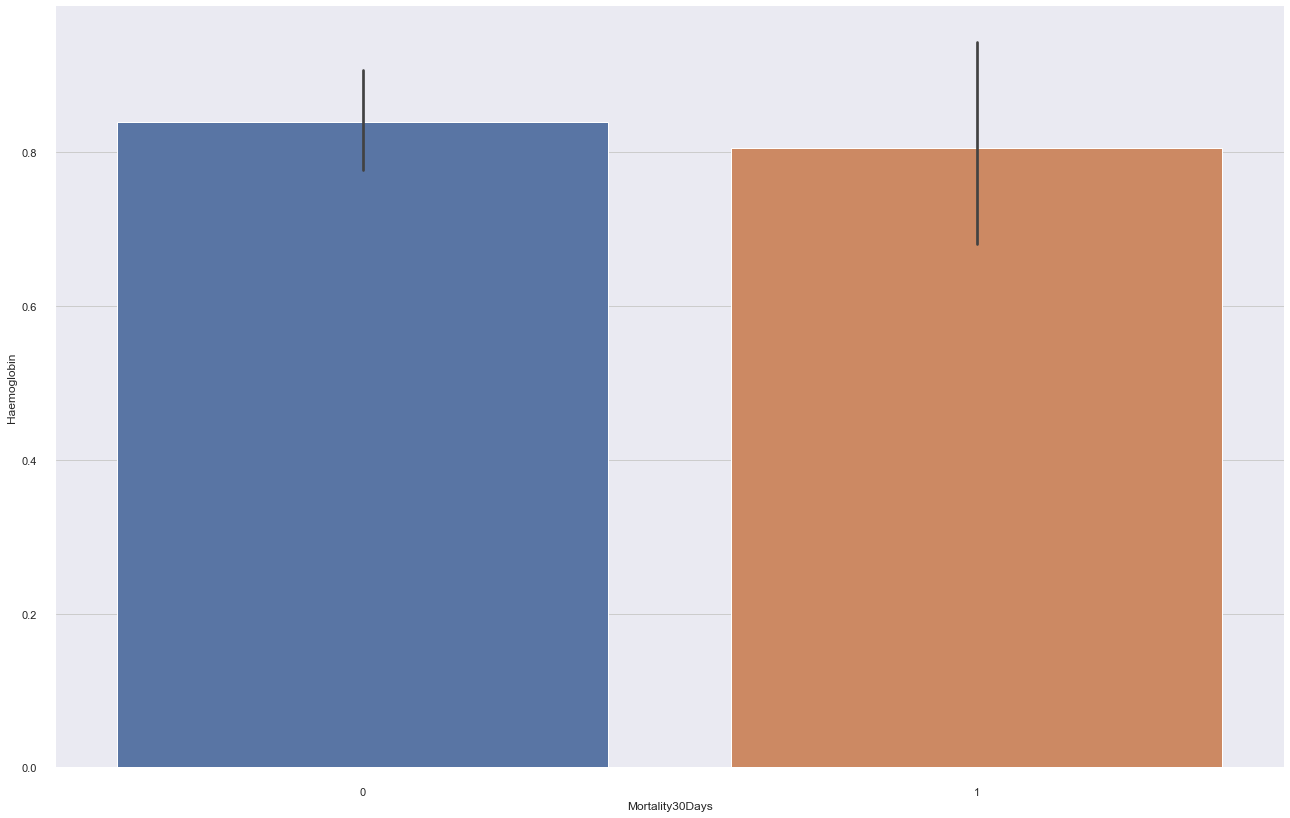

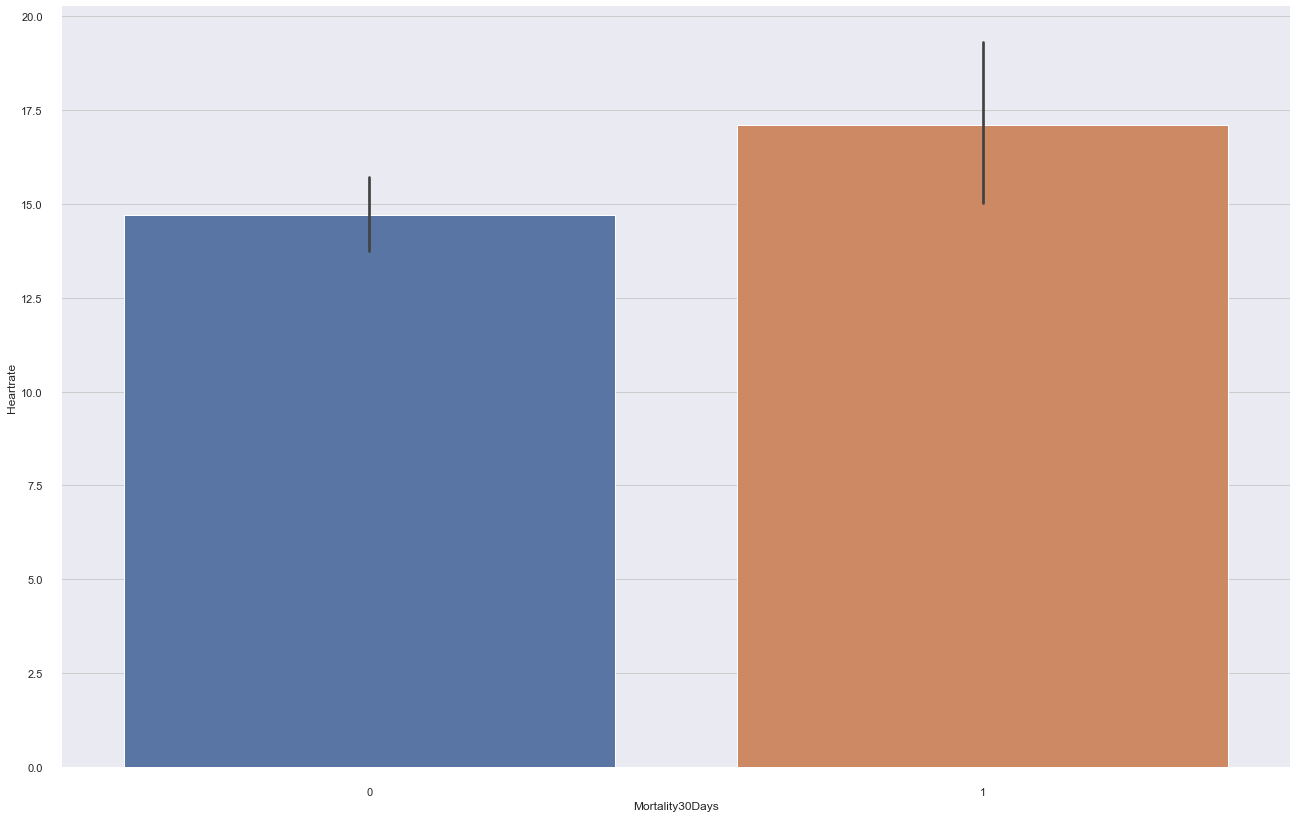

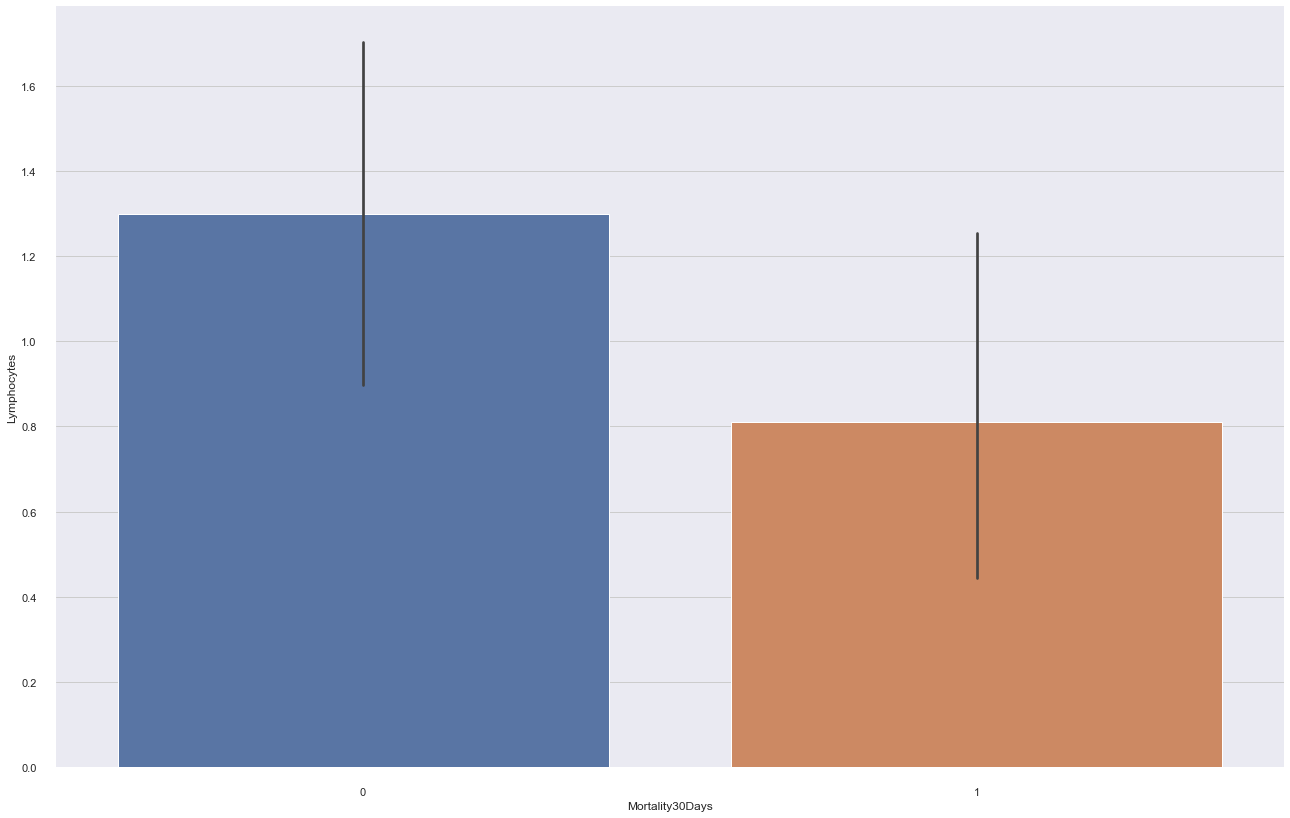

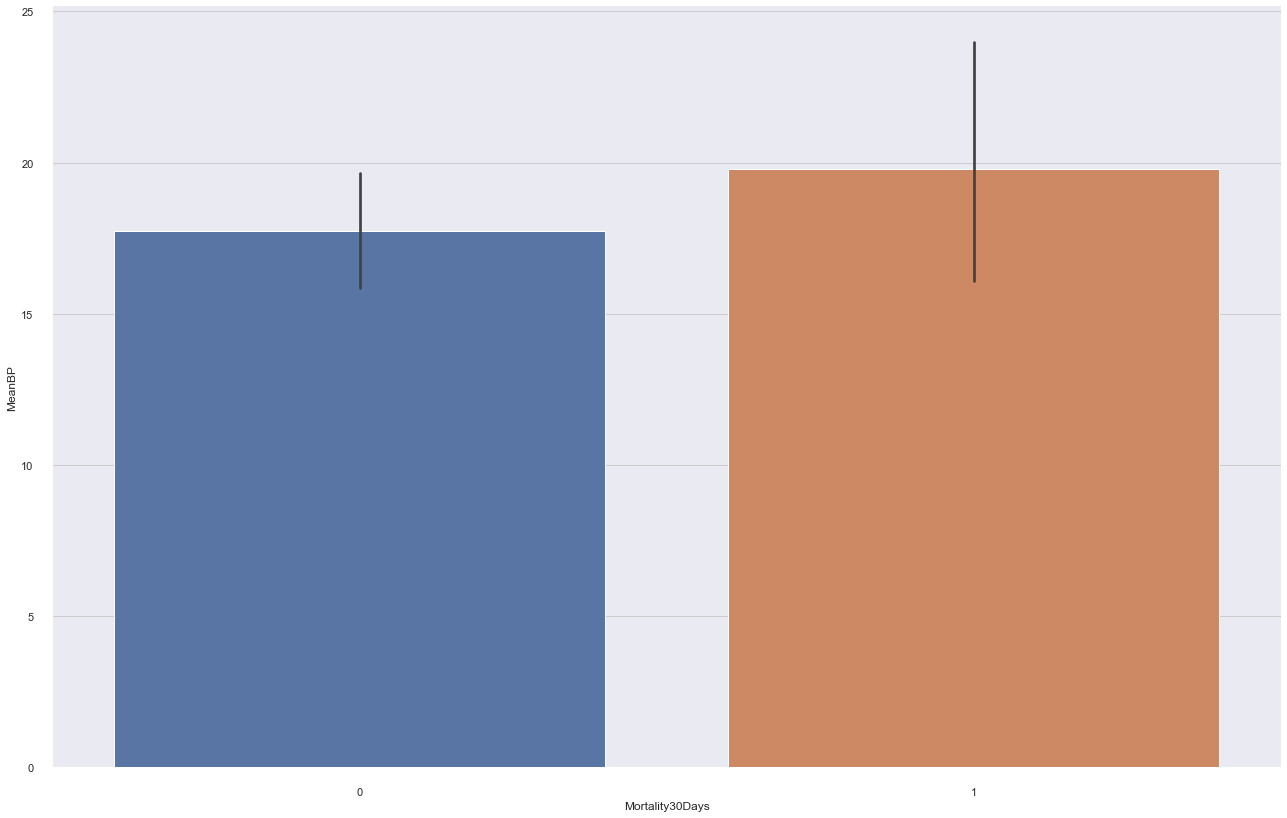

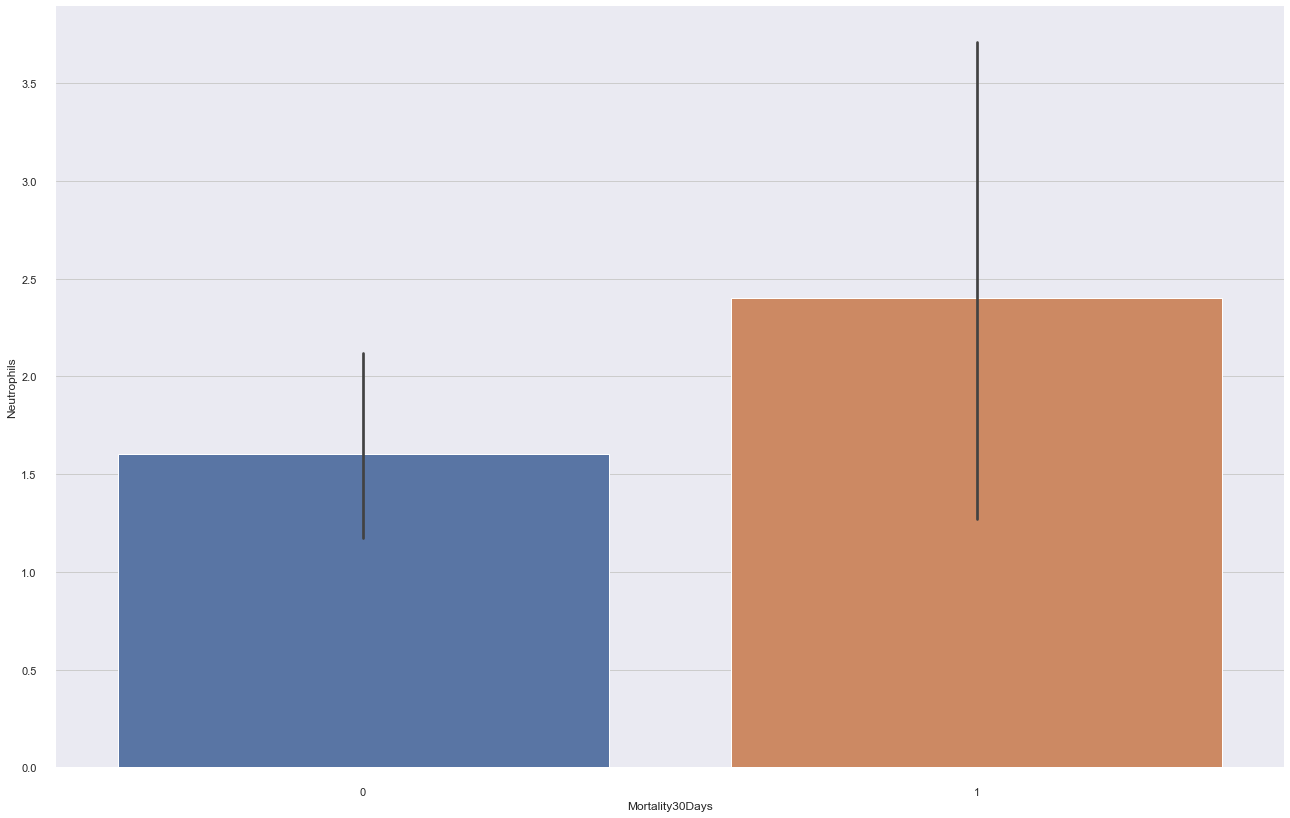

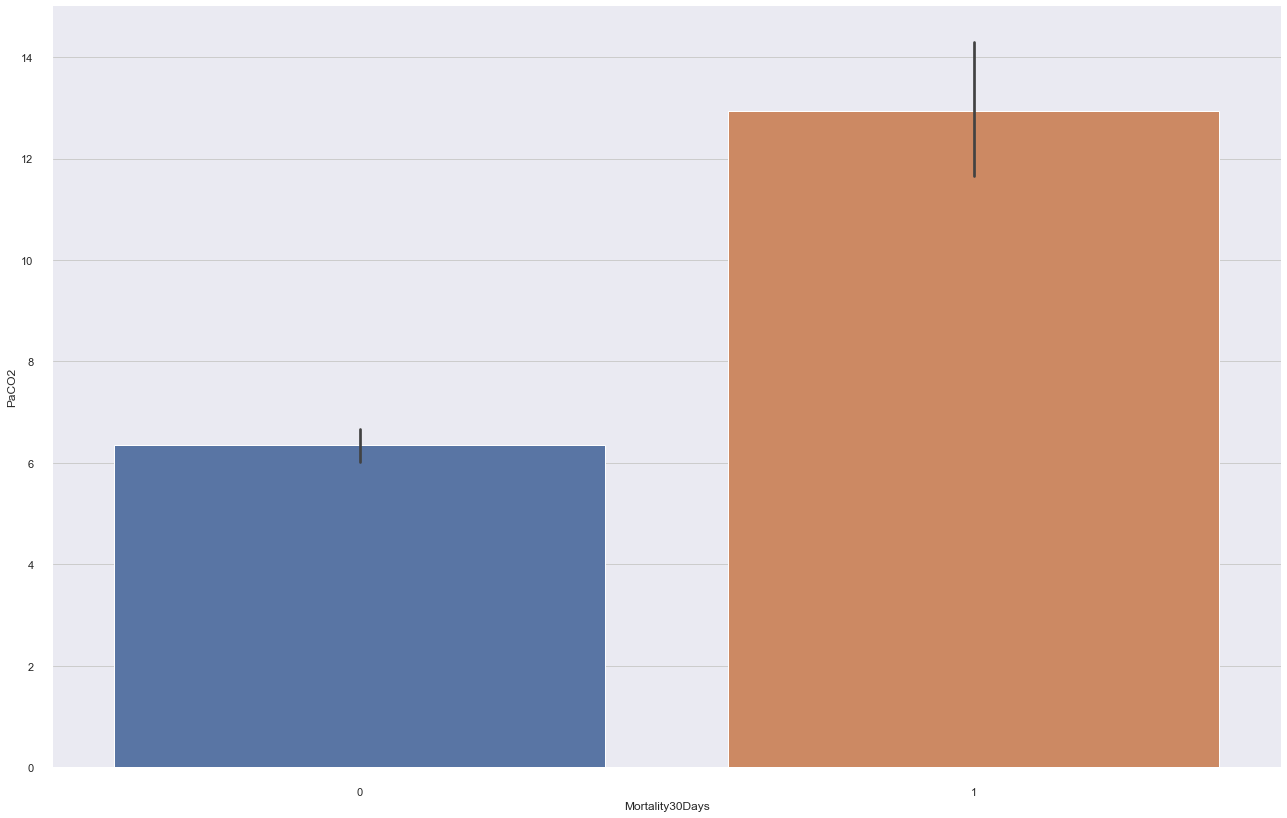

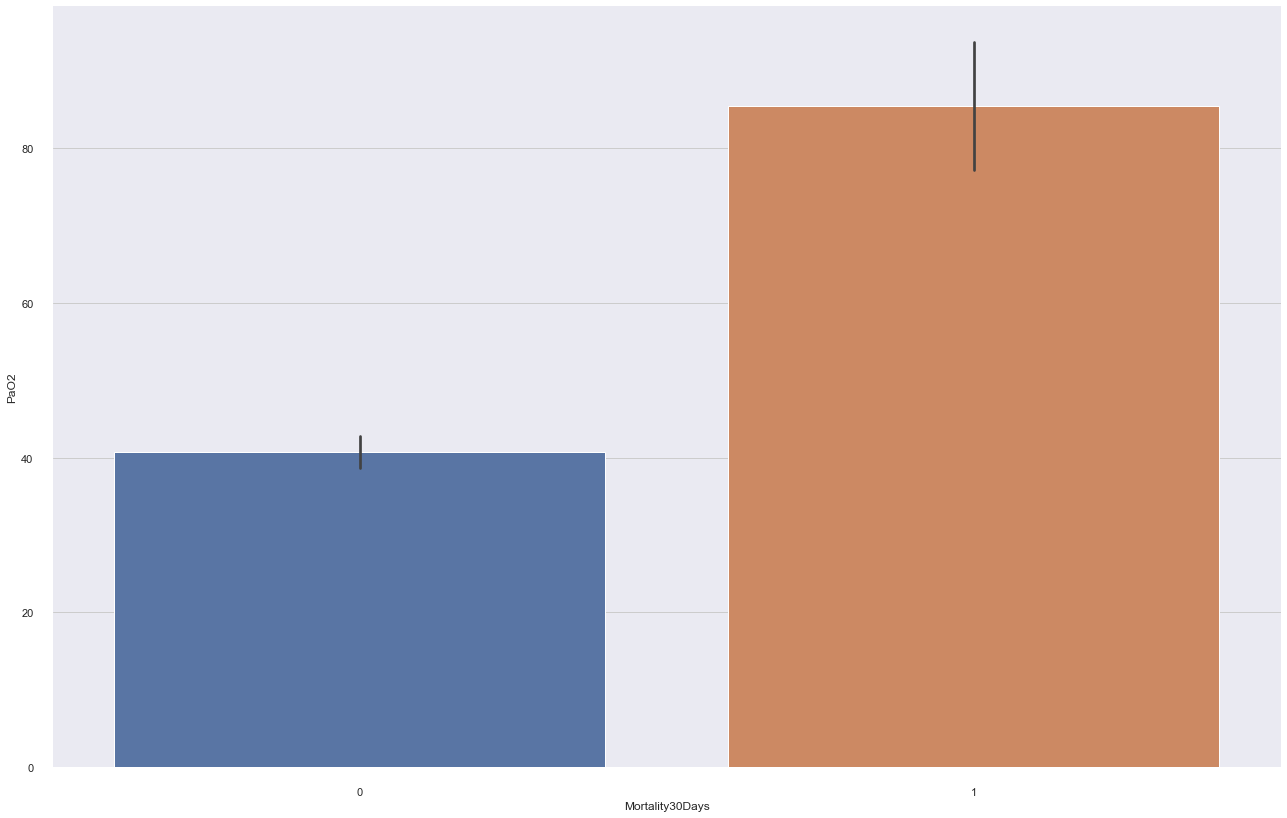

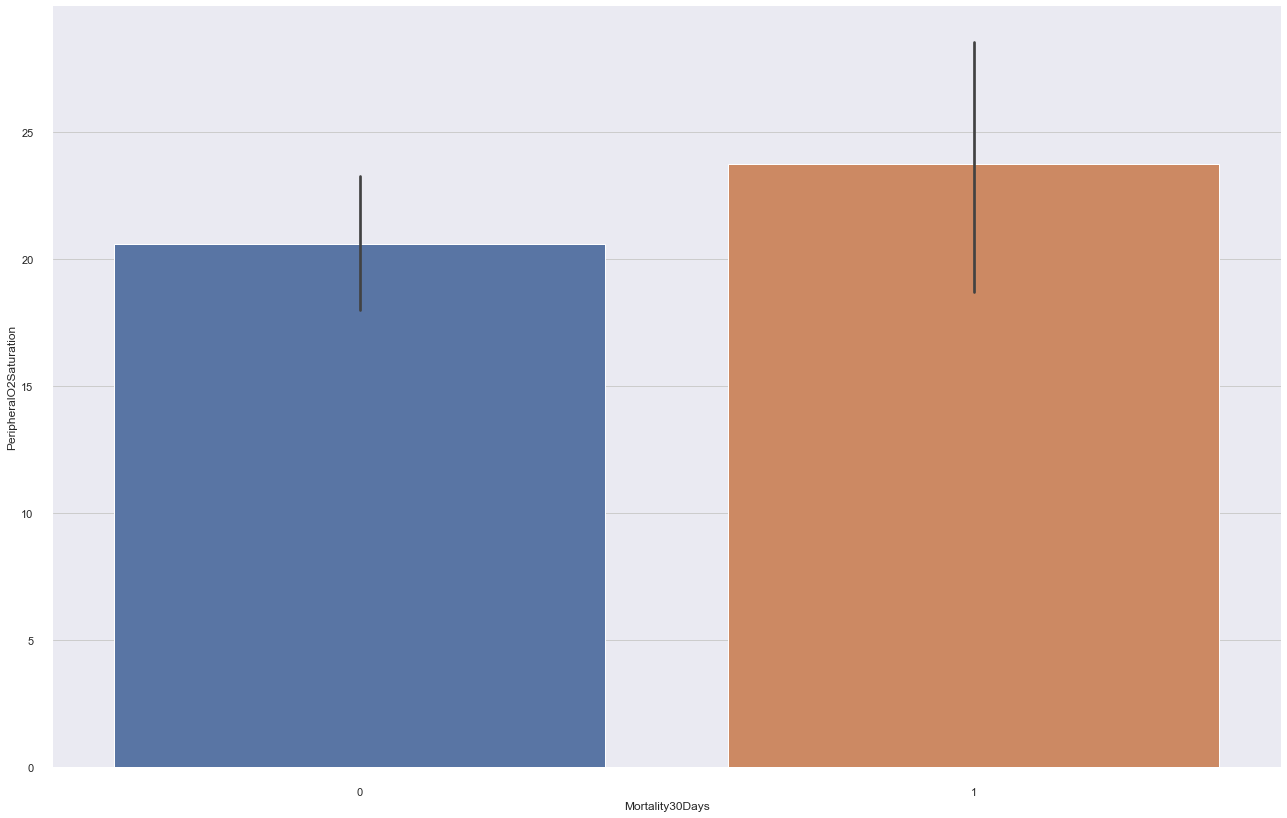

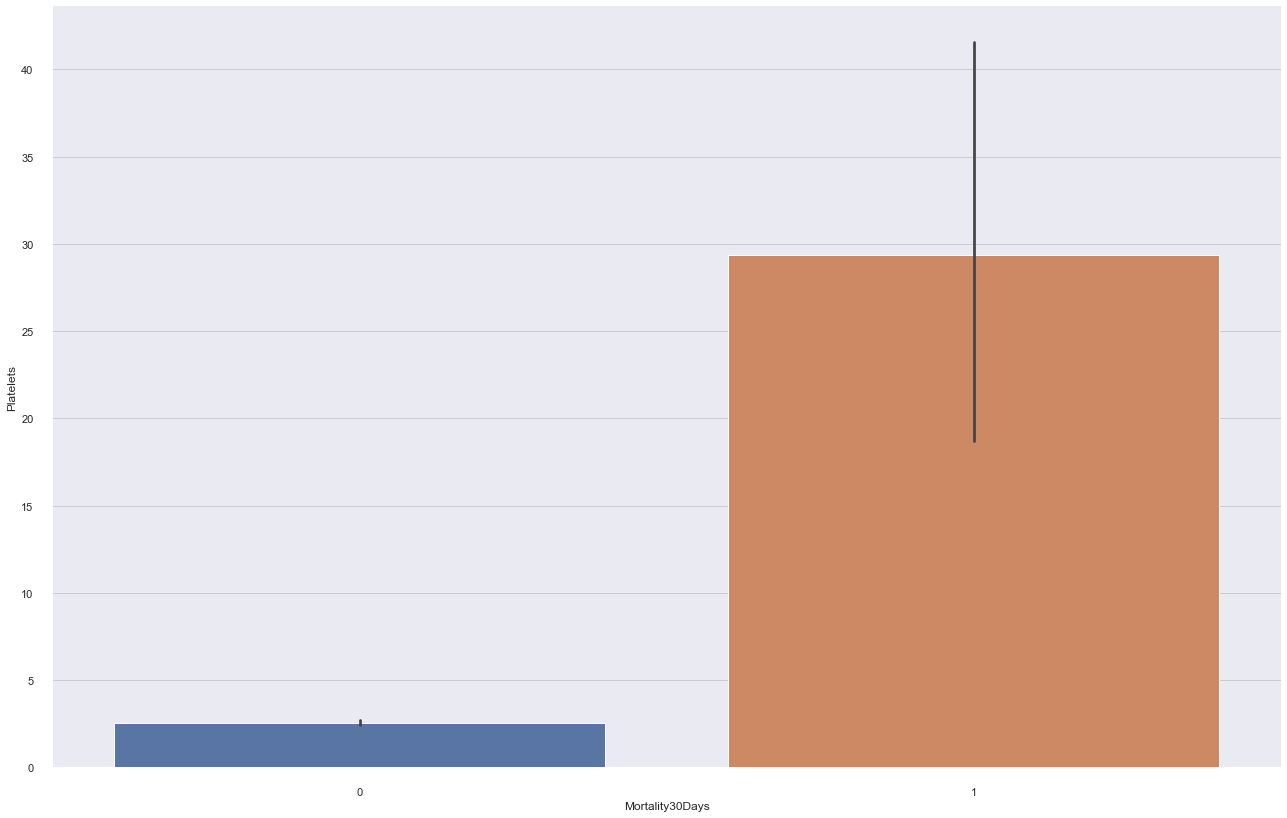

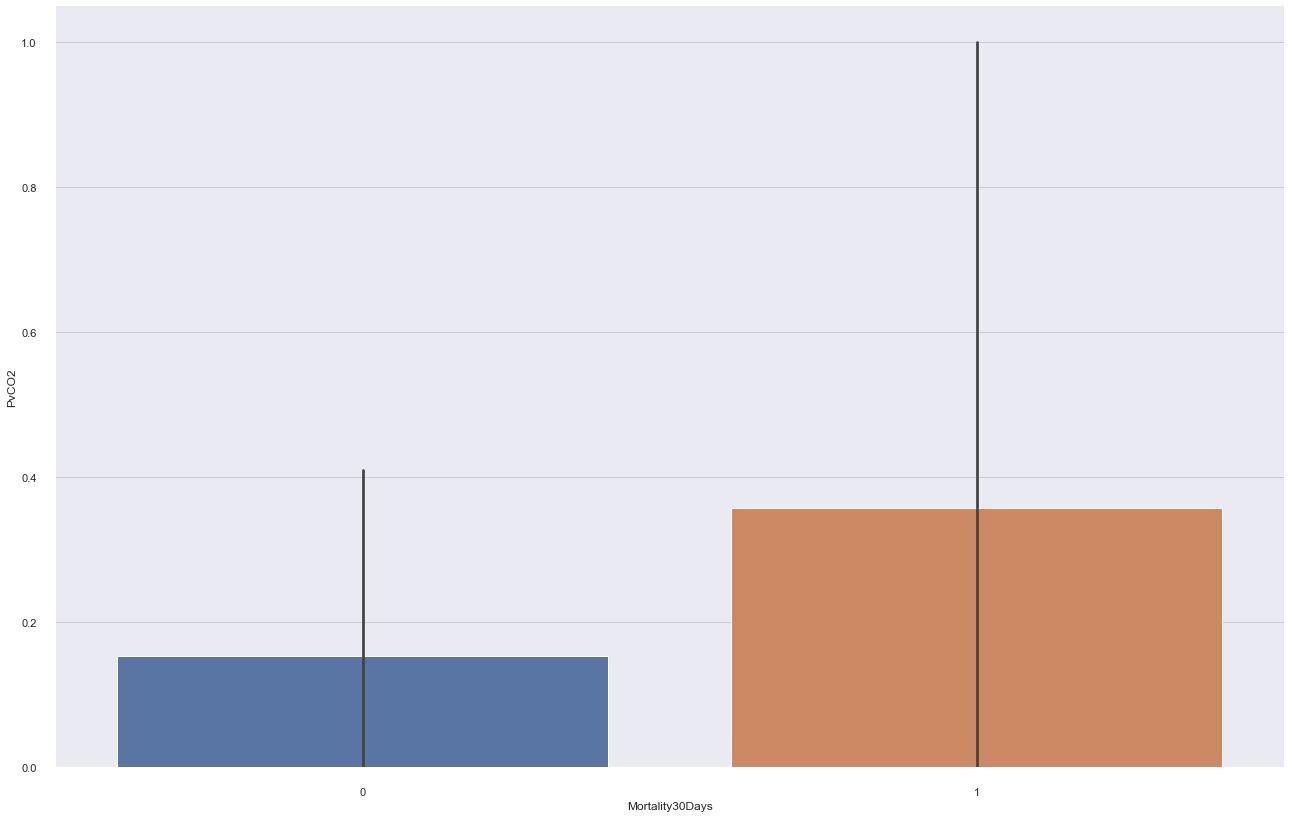

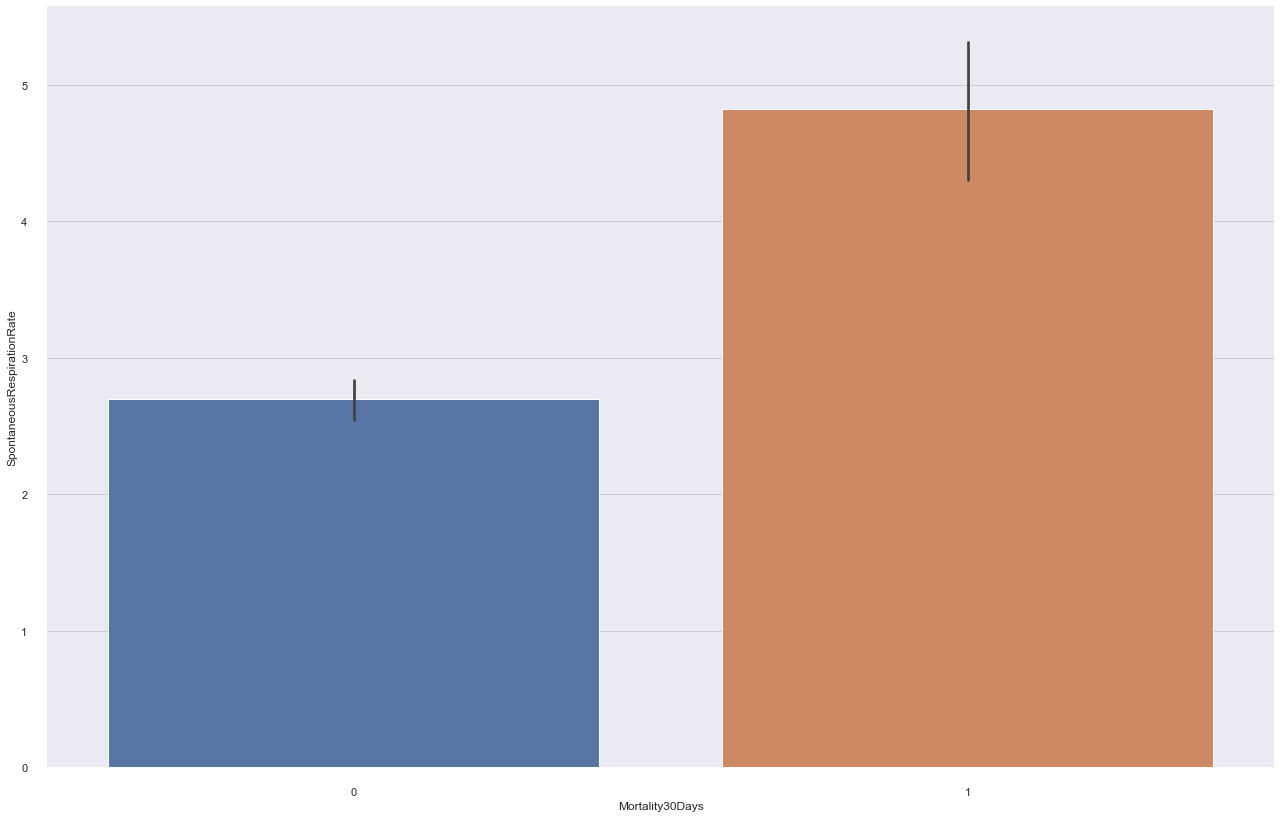

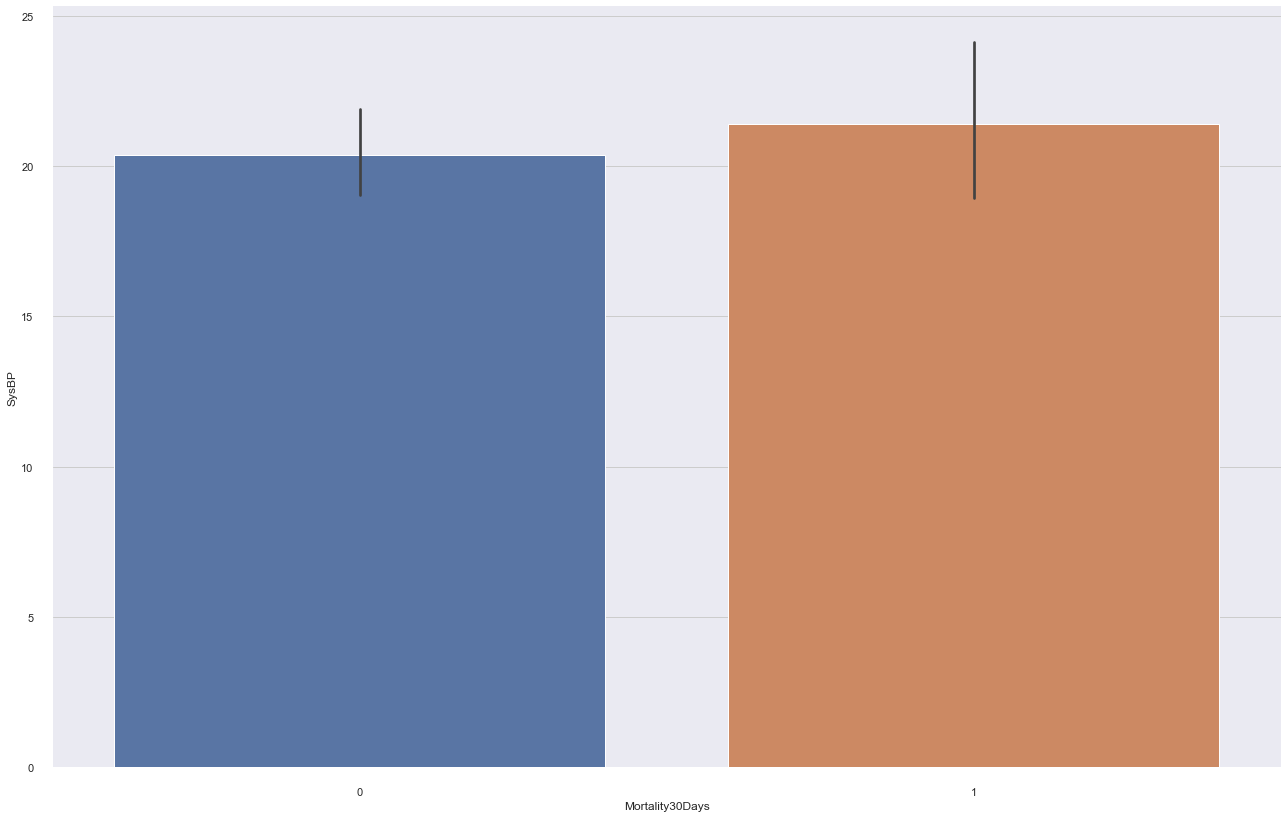

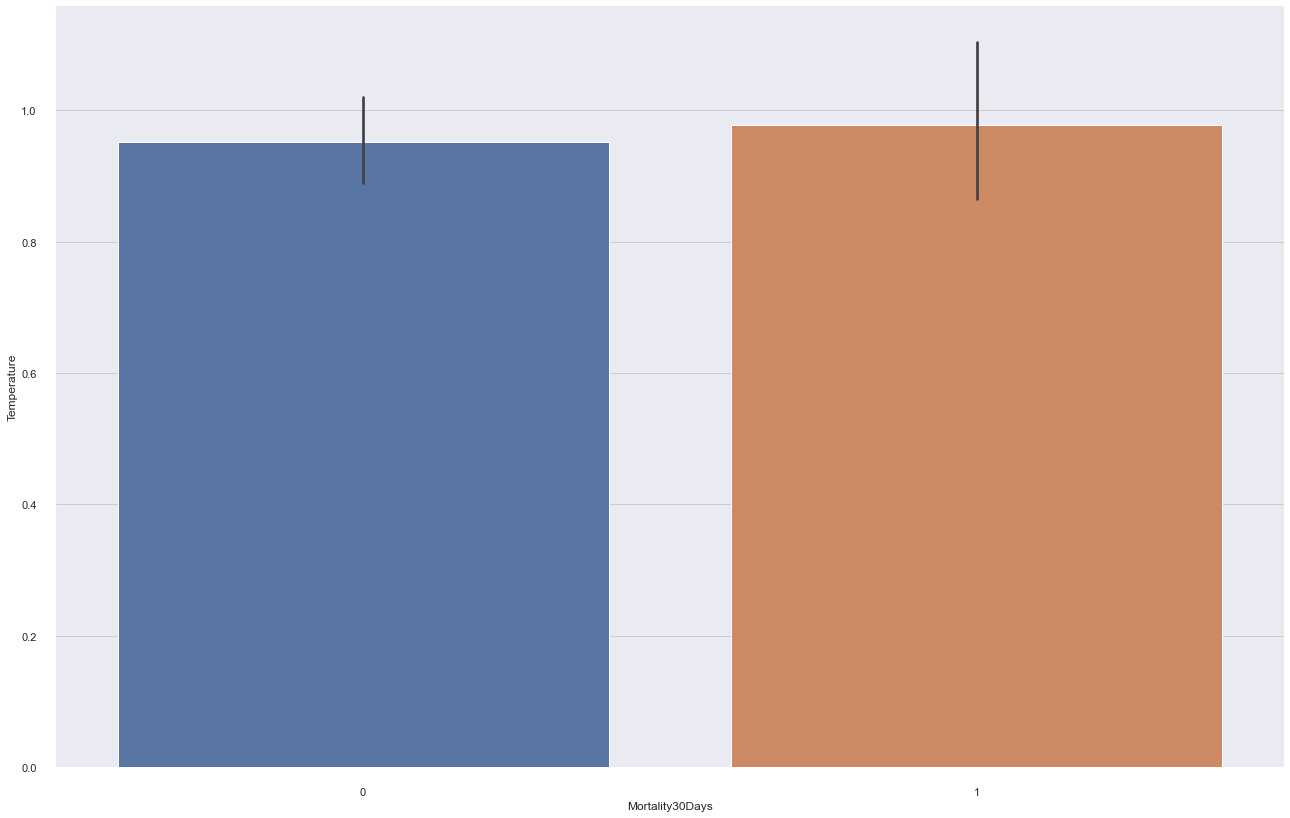

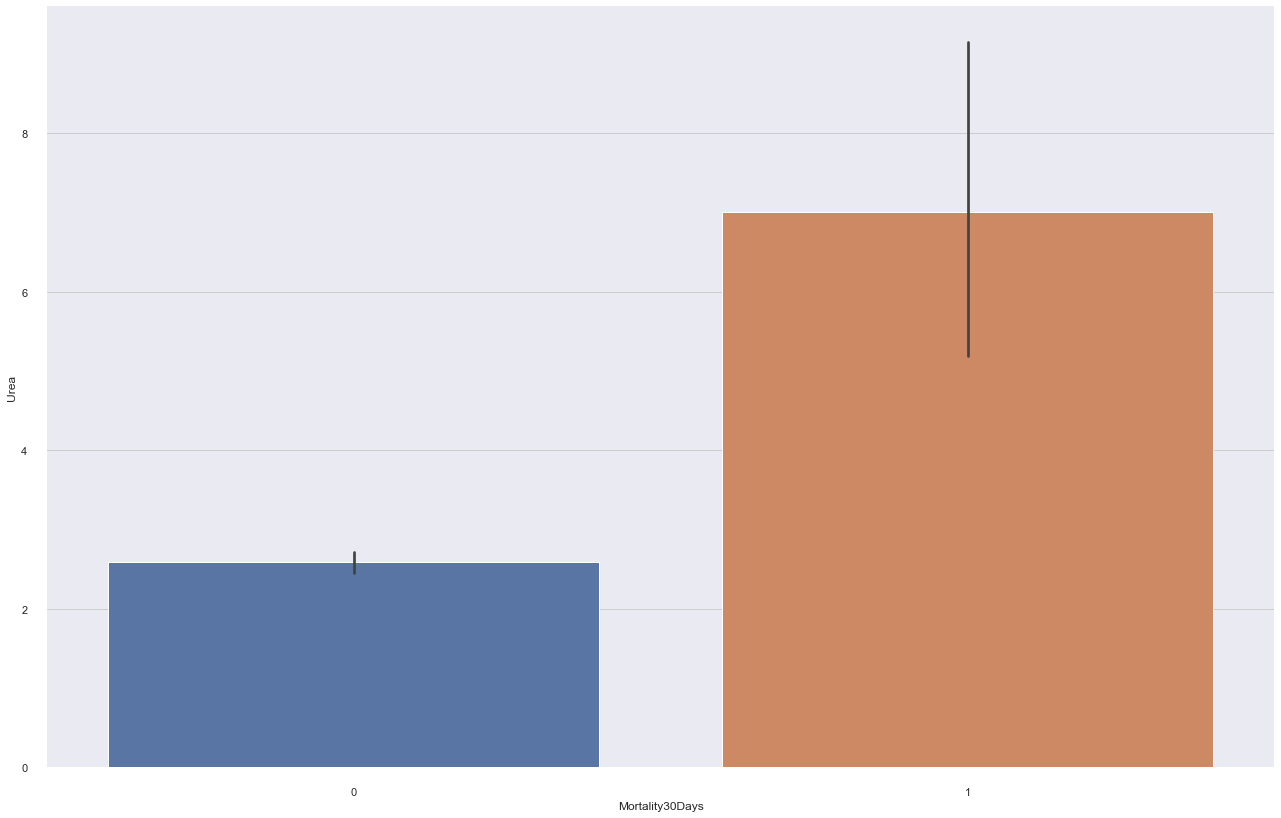

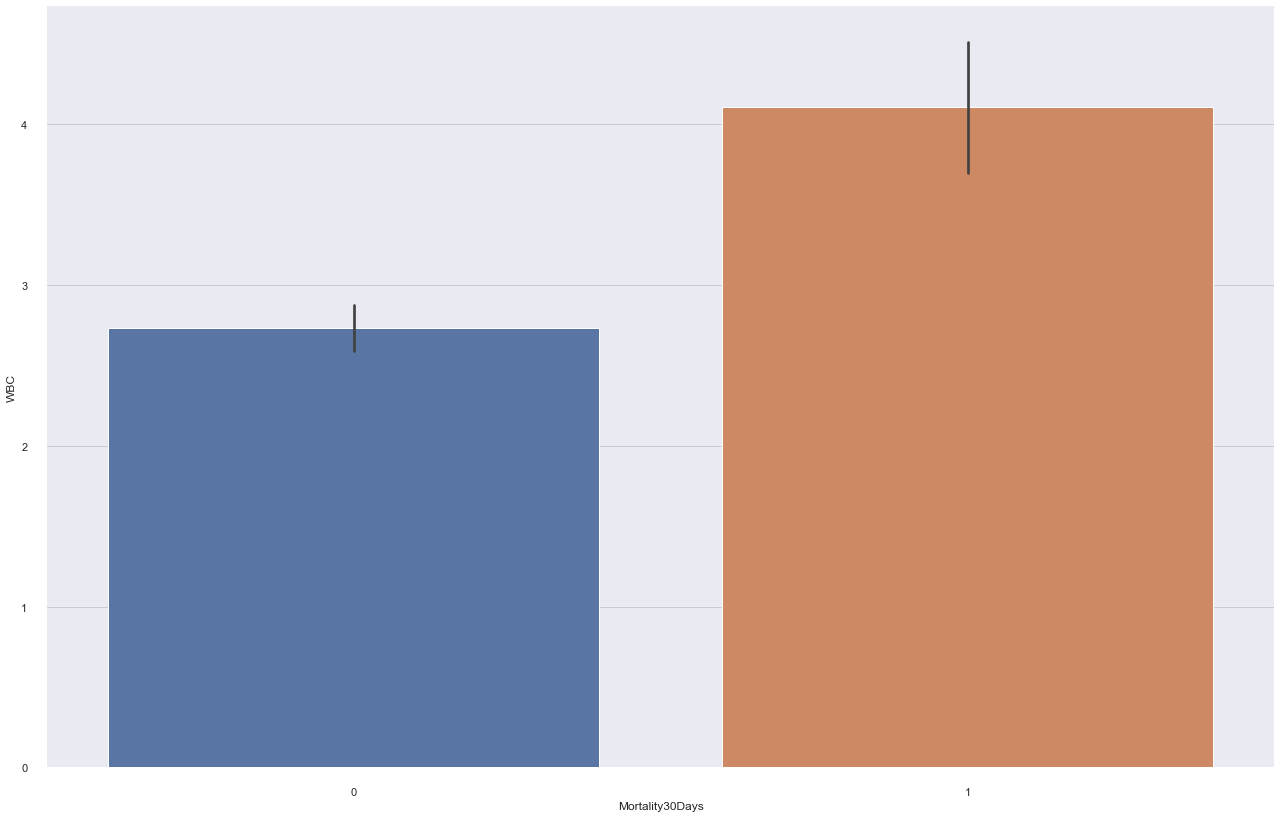

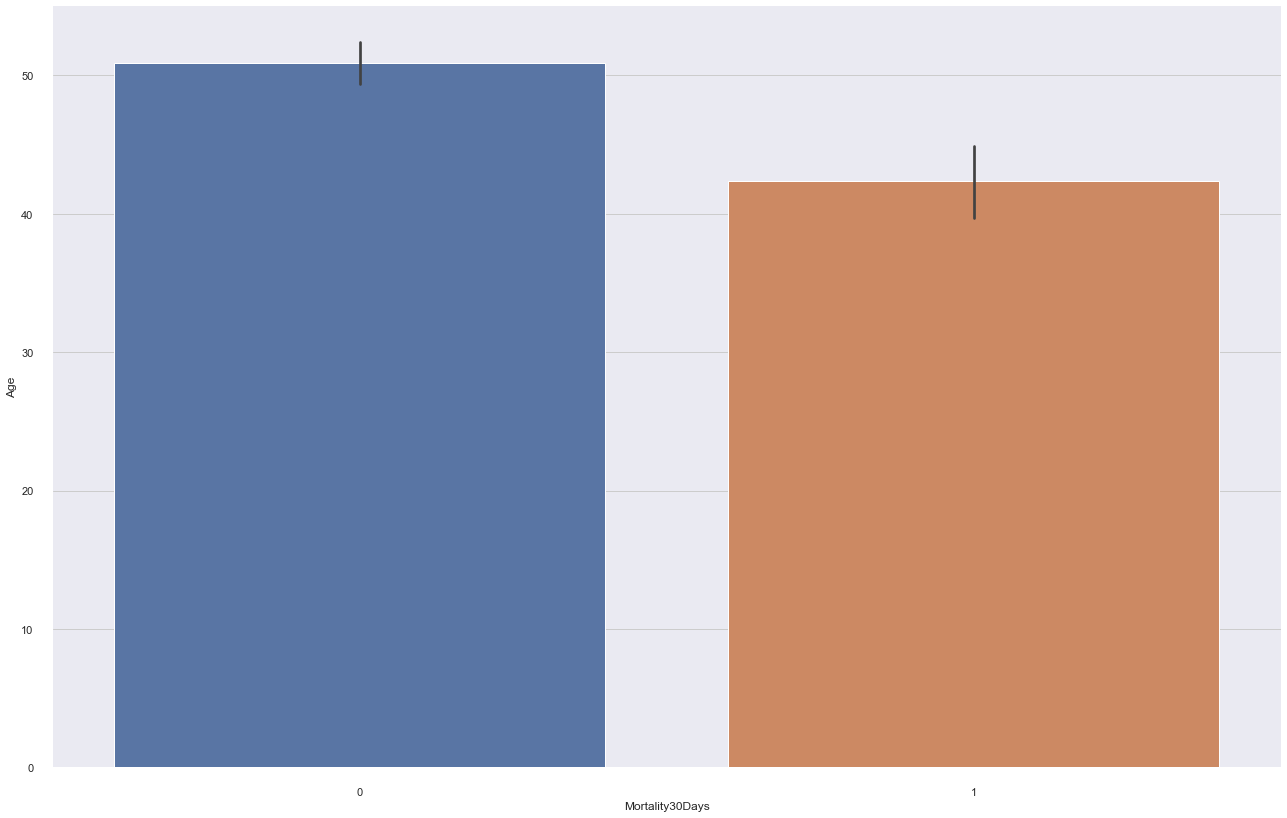

In [16]:
# Boxplot comparing aggregated heartrate of patients grouped by mortality outcome

agg_columns = df_df.columns.values.tolist()
del agg_columns[0]

for column in df_df.columns[1:-1]:  
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style="ticks")
    sns.barplot(x='Mortality30Days', y=column, data=df_df)  
    sns.despine(offset=10, trim=True) 
    fig.set_size_inches(22,14)
    

In [17]:
# Independent t-tests comparing means on each variable across outcomes
cols = df_df.columns.values.tolist() # column names as list
del cols[0]  # deleting patient ID
del cols[-1] # deleting outcome var

outcome = df_df['Mortality30Days'] == 0   
died = df_df.loc[outcome, cols]   # subsetting those with death outcome
survived = df_df.loc[~outcome, cols] # subsetting survived outcome

# Looping through variables and running t-tests
for i, col in enumerate(cols):
    t, p = stats.ttest_ind(died, survived)
    print(f'\t{col}: t = {t[i]:.5f}, with p-value = {p[i]:.5f}')
print("--------------------------------------------------------------")    
# Looping through variables and running same t-tests but omitting NANs
for i, col in enumerate(cols):
    t, p = stats.ttest_ind(died, survived, nan_policy = 'omit') 
    print(f'\t{col}: t = {t[i]:.5f}, with p-value = {p[i]:.5f}')


	Albumin: t = nan, with p-value = nan
	Arterialph: t = nan, with p-value = nan
	CaO2: t = nan, with p-value = nan
	DiasBP: t = -0.92914, with p-value = 0.35307
	Fibrinogen: t = nan, with p-value = nan
	Fio2: t = nan, with p-value = nan
	Glucose: t = nan, with p-value = nan
	Haemoglobin: t = nan, with p-value = nan
	Heartrate: t = -2.23246, with p-value = 0.02583
	Lymphocytes: t = nan, with p-value = nan
	MeanBP: t = nan, with p-value = nan
	Neutrophils: t = nan, with p-value = nan
	PaCO2: t = -13.74718, with p-value = 0.00000
	PaO2: t = -14.39683, with p-value = 0.00000
	PeripheralO2Saturation: t = -1.07741, with p-value = 0.28159
	Platelets: t = -8.60733, with p-value = 0.00000
	PvCO2: t = nan, with p-value = nan
	SpontaneousRespirationRate: t = -10.77740, with p-value = 0.00000
	SysBP: t = nan, with p-value = nan
	Temperature: t = nan, with p-value = nan
	Urea: t = -7.87010, with p-value = 0.00000
	WBC: t = -7.52369, with p-value = 0.00000
	Age: t = 5.34238, with p-value = 0.00000
--

## Step 3: Classifier Implementation

In [19]:
# Splitting data into X and Y
X = df_df.iloc[:,1:-1]
Y = df_df.iloc[:,-1]

In [20]:
# Splitting into training and test data
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=1)

To address the class imbalance in the data the scale_pos_weight hyperparmater's value will be used to scale the gradient for the positive class. That is, the default value of scale_pos_weight will be altered to train a class-weighted (cost-sensitive) version of XGBoost for imbalanced classification.

In [21]:
from collections import Counter
# estimating the scale_pos_weight value to include in grid search.
counter = Counter(Y)
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 3.259


In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed=123

# Defining hyperparameter search grids

## Positive Scaling (for class imbalance)
xgb_scale_pos_weight = [int(x) for x in np.linspace(1,3.3,10)]

## Number of trees to be used
xgb_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

## Maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]

## Minimum number of instances needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

## Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]


# Learning objective used
xgb_objective = ['reg:logistic']

# Evaluation metric used 
xgb_eval_metric = ['aucpr'] 

# Create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'scale_pos_weight': xgb_scale_pos_weight, 
            'eta': xgb_eta,
            'objective': xgb_objective,
            'eval_metric': xgb_eval_metric}


In [24]:
# Creating base model to be tuned
xgb_base = XGBClassifier()

# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 200, cv = 10, verbose = 2, 
                                random_state = seed, n_jobs = -1)

# Fitting the random search model
xgb_random.fit(X_train, y_train.astype(int))

# Get the optimal parameters
print(" The optimal parameters were identified as: ")
xgb_random.best_params_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\Users\lila_\Documents\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


 The optimal parameters were identified as: 


{'scale_pos_weight': 2,
 'objective': 'reg:logistic',
 'n_estimators': 600,
 'min_child_weight': 1,
 'max_depth': 14,
 'eval_metric': 'aucpr',
 'eta': 0.1}

In [26]:
# Final model created using best parameters (on all training set)
best_model = xgb_random.best_estimator_

# Predicting probabilities in test set based on final model using cv
y_preds= best_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       225
           1       0.91      0.79      0.85        73

    accuracy                           0.93       298
   macro avg       0.92      0.88      0.90       298
weighted avg       0.93      0.93      0.93       298



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.948


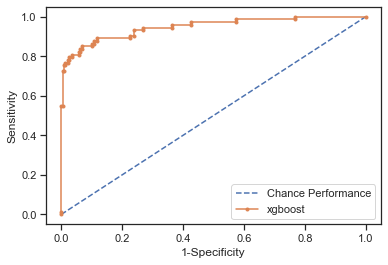

<Figure size 432x288 with 0 Axes>

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Generating a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# Predicting probabilities for test data based on best model estimates
y_probs = best_model.predict_proba(X_test)
# Dropping probabilities for the negative outcome 
y_probs = y_probs[:, 1]
# Calculating auc scores
ns_auc = roc_auc_score(y_test, ns_probs)
y_auc = roc_auc_score(y_test, y_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (y_auc))
# calculating roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
y_fpr, y_tpr, _ = roc_curve(y_test, y_probs)
# ploting the roc curves
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Chance Performance') 
plt.plot(y_fpr, y_tpr, marker='.', label='xgboost')
# axis labels
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# show the legend
plt.legend()
# show the plot
plt.show()
fig = plt.figure()
plt.savefig("AUC ROC")

[0.01250032 0.01896828 0.03609978 0.02954873 0.03771721 0.04073988
 0.02683644 0.01715147 0.02363511 0.02064459 0.02409839 0.00929299
 0.09215222 0.15305434 0.02061505 0.13551103 0.         0.09826142
 0.02532694 0.01413379 0.07113142 0.06963062 0.02294994]


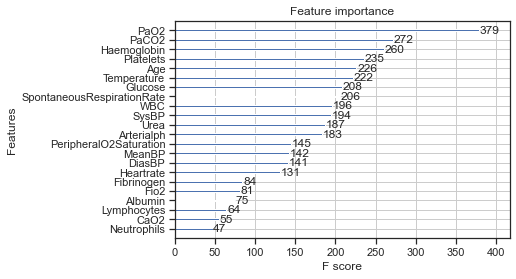

In [34]:
# plotting feature importance from final model
from xgboost import plot_importance
print(best_model.feature_importances_)
plot_importance(best_model)
plt.show()